# Canny edge

In [8]:
import numpy as np
from scipy import ndimage
import cv2
from PIL import Image
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure

In [9]:
def gaussian_kernel(size, sigma=10):
    size = int(size) // 2
    x, y = np.mgrid[-size:size+1, -size:size+1]
    normal = 1 / (2.0 * np.pi * sigma**2)
    g =  np.exp(-((x**2 + y**2) / (2.0*sigma**2))) * normal
    return g

In [10]:
def sobel_filters(img):
    Kx = np.array([[-1, 0, 1], [-2, 0, 2], [-1, 0, 1]], np.float32)
    Ky = np.array([[1, 2, 1], [0, 0, 0], [-1, -2, -1]], np.float32)
    
    Ix = ndimage.filters.convolve(img, Kx)
    Iy = ndimage.filters.convolve(img, Ky)
    
    G = np.hypot(Ix, Iy)
    G = G / G.max() * 255
    theta = np.arctan2(Iy, Ix)
    
    return (G, theta)

In [11]:
def visualize(img,dst):
    plt.subplot(121),plt.imshow(img),plt.title('Original')
    plt.xticks([]), plt.yticks([])
    plt.subplot(122),plt.imshow(dst,cmap="gray"),plt.title('Blurred')
    plt.xticks([]), plt.yticks([])
    plt.show()

In [12]:
def Canny_detector(img):
    weak_th = None 
    strong_th = None
    # conversion of image to grayscale
    img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
       
    # Noise reduction step
    g=gaussian_kernel(5,1)
    
    img= cv2.filter2D(src=img, kernel=g, ddepth=30)

    mag,ang=sobel_filters(img)
       
    # setting the minimum and maximum thresholds 
    # for double thresholding
    mag_max = np.max(mag)
    if not weak_th:weak_th = mag_max * 0.1
    if not strong_th:strong_th = mag_max * 0.5
      
    # getting the dimensions of the input image  
    height, width = img.shape
       
    # Looping through every pixel of the grayscale 
    # image
    for i_x in range(width):
        for i_y in range(height):
               
            grad_ang = ang[i_y, i_x]
            grad_ang = abs(grad_ang-180) if abs(grad_ang)>180 else abs(grad_ang)
               
            # selecting the neighbours of the target pixel
            # according to the gradient direction
            # In the x axis direction
            if grad_ang<= 22.5:
                neighb_1_x, neighb_1_y = i_x-1, i_y
                neighb_2_x, neighb_2_y = i_x + 1, i_y
              
            # top right (diagonal-1) direction
            elif grad_ang>22.5 and grad_ang<=(22.5 + 45):
                neighb_1_x, neighb_1_y = i_x-1, i_y-1
                neighb_2_x, neighb_2_y = i_x + 1, i_y + 1
              
            # In y-axis direction
            elif grad_ang>(22.5 + 45) and grad_ang<=(22.5 + 90):
                neighb_1_x, neighb_1_y = i_x, i_y-1
                neighb_2_x, neighb_2_y = i_x, i_y + 1
              
            # top left (diagonal-2) direction
            elif grad_ang>(22.5 + 90) and grad_ang<=(22.5 + 135):
                neighb_1_x, neighb_1_y = i_x-1, i_y + 1
                neighb_2_x, neighb_2_y = i_x + 1, i_y-1
              
            # Now it restarts the cycle
            elif grad_ang>(22.5 + 135) and grad_ang<=(22.5 + 180):
                neighb_1_x, neighb_1_y = i_x-1, i_y
                neighb_2_x, neighb_2_y = i_x + 1, i_y
               
            # Non-maximum suppression step
            if width>neighb_1_x>= 0 and height>neighb_1_y>= 0:
                if mag[i_y, i_x]<mag[neighb_1_y, neighb_1_x]:
                    mag[i_y, i_x]= 0
                    continue
   
            if width>neighb_2_x>= 0 and height>neighb_2_y>= 0:
                if mag[i_y, i_x]<mag[neighb_2_y, neighb_2_x]:
                    mag[i_y, i_x]= 0
   
    weak_ids = np.zeros_like(img)
    strong_ids = np.zeros_like(img)              
    ids = np.zeros_like(img)
    print(strong_th,weak_th)
    # double thresholding step
    for i_x in range(width):
        for i_y in range(height):
              
            grad_mag = mag[i_y, i_x]
              
            if grad_mag<weak_th:
                mag[i_y, i_x]= 0
            elif strong_th>grad_mag>= weak_th:
                ids[i_y, i_x]= 1
            else:
                ids[i_y, i_x]= 2
       
       
    # finally returning the magnitude of
    # gradients of edges
    return mag


127.5 25.5


<Figure size 1440x720 with 0 Axes>

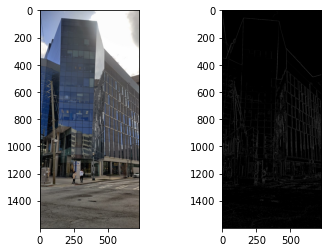

In [13]:
frame = cv2.imread('CV_assignment_2/gsu2.jpeg')
  
# calling the designed function for
# finding edges
canny_img = Canny_detector(frame)
   
# Displaying the input and output image  
plt.figure(figsize=(20,10)) 
f, plots = plt.subplots(1, 2) 
plots[0].imshow(cv2.cvtColor(frame, cv2.COLOR_BGR2RGB))
plots[1].imshow(canny_img,cmap='gray')

In [14]:
cv2.imwrite("canny_img.jpg",canny_img)

True

# Harris corner detection

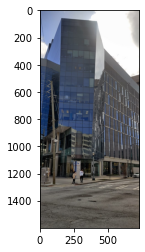

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import cv2

%matplotlib inline

# Read in the image
image = cv2.imread('CV_assignment_2/gsu2.jpeg')

# Make a copy of the image
image_copy = np.copy(image)

# Change color to RGB (from BGR)
image_copy = cv2.cvtColor(image_copy, cv2.COLOR_BGR2RGB)

plt.imshow(image_copy)

True

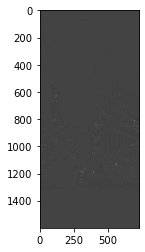

In [2]:
# Convert to grayscale
gray = cv2.cvtColor(image_copy, cv2.COLOR_RGB2GRAY)
gray = np.float32(gray)

# Detect corners 
dst = cv2.cornerHarris(gray, 2, 3, 0.07)

# Dilate corner image to enhance corner points
dst = cv2.dilate(dst,None)

plt.imshow(dst, cmap='gray')
cv2.imwrite("corner1_img.jpg",dst)

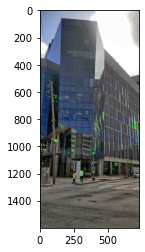

In [3]:
# This value vary depending on the image and how many corners you want to detect
# Try changing this free parameter, 0.1, to be larger or smaller and see what happens
thresh = 0.1*dst.max()

# Create an image copy to draw corners on
corner_image = np.copy(image_copy)

# Iterate through all the corners and draw them on the image (if they pass the threshold)
for j in range(0, dst.shape[0]):
    for i in range(0, dst.shape[1]):
        if(dst[j,i] > thresh):
    
            cv2.circle( corner_image, (i, j), 1, (0,255,0), 1)

plt.imshow(corner_image)

In [ ]:
cv2.imwrite("corner_img.jpg",corner_image)

# Integral Image

In [15]:
def integral_image(image, *, dtype=None):
    if dtype is None and image.real.dtype.kind == 'f':
        dtype = np.promote_types(image.dtype, np.float64)

    S = image
    for i in range(image.ndim):
        S = S.cumsum(axis=i, dtype=dtype)
    return S


def integrate(ii, start, end):
    start = np.atleast_2d(np.array(start))
    end = np.atleast_2d(np.array(end))
    rows = start.shape[0]

    total_shape = ii.shape
    total_shape = np.tile(total_shape, [rows, 1])

    start_negatives = start < 0
    end_negatives = end < 0
    start = (start + total_shape) * start_negatives + \
             start * ~(start_negatives)
    end = (end + total_shape) * end_negatives + \
           end * ~(end_negatives)

    if np.any((end - start) < 0):
        raise IndexError('end coordinates must be greater or equal to start')

    S = np.zeros(rows)
    bit_perm = 2 ** ii.ndim
    width = len(bin(bit_perm - 1)[2:])
    for i in range(bit_perm):  
        binary = bin(i)[2:].zfill(width)
        bool_mask = [bit == '1' for bit in binary]

        sign = (-1)**sum(bool_mask)

        bad = [np.any(((start[r] - 1) * bool_mask) < 0)
               for r in range(rows)]  

        corner_points = (end * (np.invert(bool_mask))) + \
                         ((start - 1) * bool_mask)

        S += [sign * ii[tuple(corner_points[r])] if(not bad[r]) else 0
              for r in range(rows)]
    return S

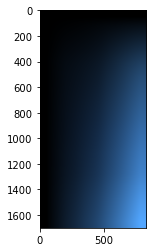

In [16]:
frame = cv2.imread('CV_assignment_2/gsu2.jpeg')
frame = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
frame= cv2.copyMakeBorder(frame, 50, 50, 50, 50, cv2.BORDER_CONSTANT, (0,0,0))
frame=integral_image(frame)
frame = frame/np.amax(frame)
frame = np.clip(frame, 0,255)
plt.imshow(frame)